# COLECT DATA

UCI repository is a synthetic dataset that reflects real predictive maintenance in industry to the best of their knowledge. 

The dataset consists of 10 000 data points stored as rows with 14 features in columns.
https://archive.ics.uci.edu/datasets?search=AI4I%202020%20Predictive%20Maintenance%20Dataset

UID: unique identifier from 1 to 10000;
Product ID: consisting of a letter L, M, or H related to quality and time production (finishing) --> low: 2s, medium: 3s and high: 5s;

Air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K;

Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K;

Rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise;

Torque [Nm]: torque values are normally distributed around 40 Nm with a standard deviation of 10 Nm and no negative values;

Tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process;

Machine failure: label that indicates, machine has failed for any of the following failure modes:

Tool wear failure (TWF): the tool will be replaced of fail by tool wear time (200 - 240 mins);

Heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm;

Power failure (PWF):the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails;

Overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain;

Random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters.  

Target:

Machine failure: 0 or 1:

TWF: 0 or 1

Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


Importing Dataset

In [3]:
df = pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Describing dataset

In [9]:
df.describe(percentiles=[]).T

,count,mean,std,min,50%,max
UDI,10000.0,5000.50000,2886.895680,1.0,5000.5,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,300.1,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,310.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1503.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,40.1,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,108.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

Features --- Calculate the Delta Temperature and the Power of machine (watts)

In [9]:
df['Temp_Delta']=df['Process temperature [K]']-df['Air temperature [K]']
df['Power'] = 2 * np.pi * df['Rotational speed [rpm]'] * df['Torque [Nm]'] / 60

In [10]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp_Delta,Power,Planned_Stop,Time/Part
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.590560,0,3
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.722724,0,2
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.387543,0,2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.504659,0,2
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.816608,0,2


Adding the time for each part

In [11]:
label = {'L':2,'M':3,'H':5}

df['Time/Part'] = df['Type'].map(label)

In [12]:
num_data = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Temp_Delta', 'Power']
categorical = ['Type', 'Time/Part']
type_of_failure = ['HDF','PWF','OSF','RNF']

target1 = ['Failures']
target2 = ['TWF']

In [13]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp_Delta,Power,Planned_Stop,Time/Part
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.590560,0,3
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.722724,0,2
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.387543,0,2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.504659,0,2
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.816608,0,2


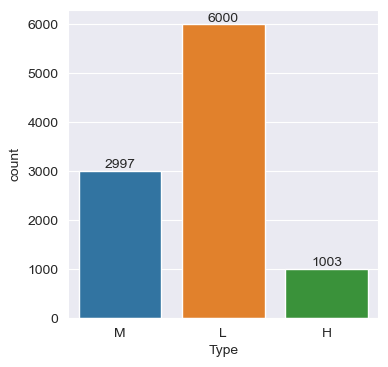

In [14]:
plt.figure(figsize=(4,4))
f = sns.countplot(data = df, x = categorical[0])
f.bar_label(f.containers[0])
plt.show()

In [15]:
print('TWF:',df['TWF'].sum())
print('HDF:',df['HDF'].sum())
print('PWF:',df['PWF'].sum())
print('OSF:',df['OSF'].sum())
print('RNF:',df['RNF'].sum())

TWF: 46
HDF: 115
PWF: 95
OSF: 98
RNF: 19


# CLEANING DATABASE

In [16]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
Temp_Delta                 0
Power                      0
Planned_Stop               0
Time/Part                  0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df['Machine failure'].sum()

339

In [19]:
df['TWF'].sum()

46

In [20]:
df['Failures'] =  df['Machine failure'] - df['TWF']
df['Failures'].sum()

293

In [21]:
df['Planned_Stop'] = 0

for i in range(1, len(df)):
    if df['Tool wear [min]'][i] < df['Tool wear [min]'][i - 1] and df['Failures'][i-1] == 0 and df['TWF'][i-1] == 0:
        df.at[i-1, 'Planned_Stop'] = 1

df.loc[(df['Failures'] == 1) & (df['Planned_Stop']==1), 'Planned_Stop'] = 0
        
df['Planned_Stop'].sum()

64

In [22]:
total_break = df['Planned_Stop'].sum() + df['Failures'].sum() + df['TWF'].sum()
total_break

403

In [23]:
df= df.drop(columns=['Product ID','Machine failure','HDF','PWF','OSF','RNF'])

In [24]:
df.sample(10)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,Temp_Delta,Power,Planned_Stop,Time/Part,Failures
3167,3168,L,300.4,309.7,1384,45.1,159,0,9.3,6536.439563,0,2,0
5020,5021,L,304.1,313.1,1556,36.3,86,0,9.0,5914.864984,0,2,0
993,994,M,296.1,307.1,1485,36.0,169,0,11.0,5598.318109,0,3,0
5318,5319,L,303.5,312.6,1496,39.0,21,0,9.1,6109.769393,0,2,0
8896,8897,L,297.4,308.7,1638,31.9,131,0,11.3,5471.837588,0,2,0
3033,3034,M,300.6,309.7,1934,22.8,15,0,9.1,4617.638546,0,3,0
5907,5908,H,300.8,310.4,1419,46.4,200,0,9.6,6894.916229,0,5,0
7541,7542,M,300.3,311.5,1528,40.9,76,0,11.2,6544.482040,0,3,0
9566,9567,L,299.8,311.1,1603,35.1,179,0,11.3,5892.088438,0,2,0
9907,9908,M,298.6,309.1,1487,43.2,206,0,10.5,6727.029517,1,3,0


In [25]:
df.to_csv("Dataset_Clean.csv")